In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns

# IMPORTING DATA


In [2]:
#https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [3]:
#Importation des donnees
df = pd.read_csv('Data/diabetesPima.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


***Exploration***

In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Résumer  statistique
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
df["Outcome"].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [10]:
columns = df.columns.drop('Outcome')
# 2. Créer le tableau groupé
result = df.groupby('Outcome')[columns].agg(['mean', 'max'])
# 3. Afficher proprement
pd.set_option('display.precision', 2)  # precision de 2 décimales
result

Pregnancies     Glucose      BloodPressure      SkinThickness      \
               mean max    mean  max          mean  max          mean max   
Outcome                                                                     
0              3.30  13  109.98  197         68.18  122         19.66  60   
1              4.87  17  141.26  199         70.82  114         22.16  99   

        Insulin         BMI       DiabetesPedigreeFunction          Age      
           mean  max   mean   max                     mean   max   mean max  
Outcome                                                                      
0         68.79  744  30.30  57.3                     0.43  2.33  31.19  81  
1        100.34  846  35.14  67.1                     0.55  2.42  37.07  70

# Visualizations

Age maximal: 81 Age minimale: 21


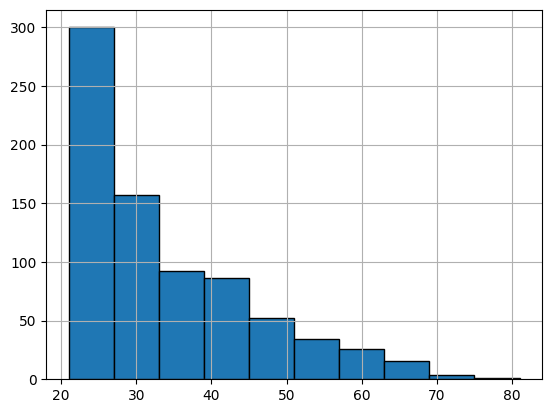

In [11]:
df["Age"].hist(edgecolor = "black");
print("Age maximal: " + str(df["Age"].max()) + " Age minimale: " + str(df["Age"].min()))

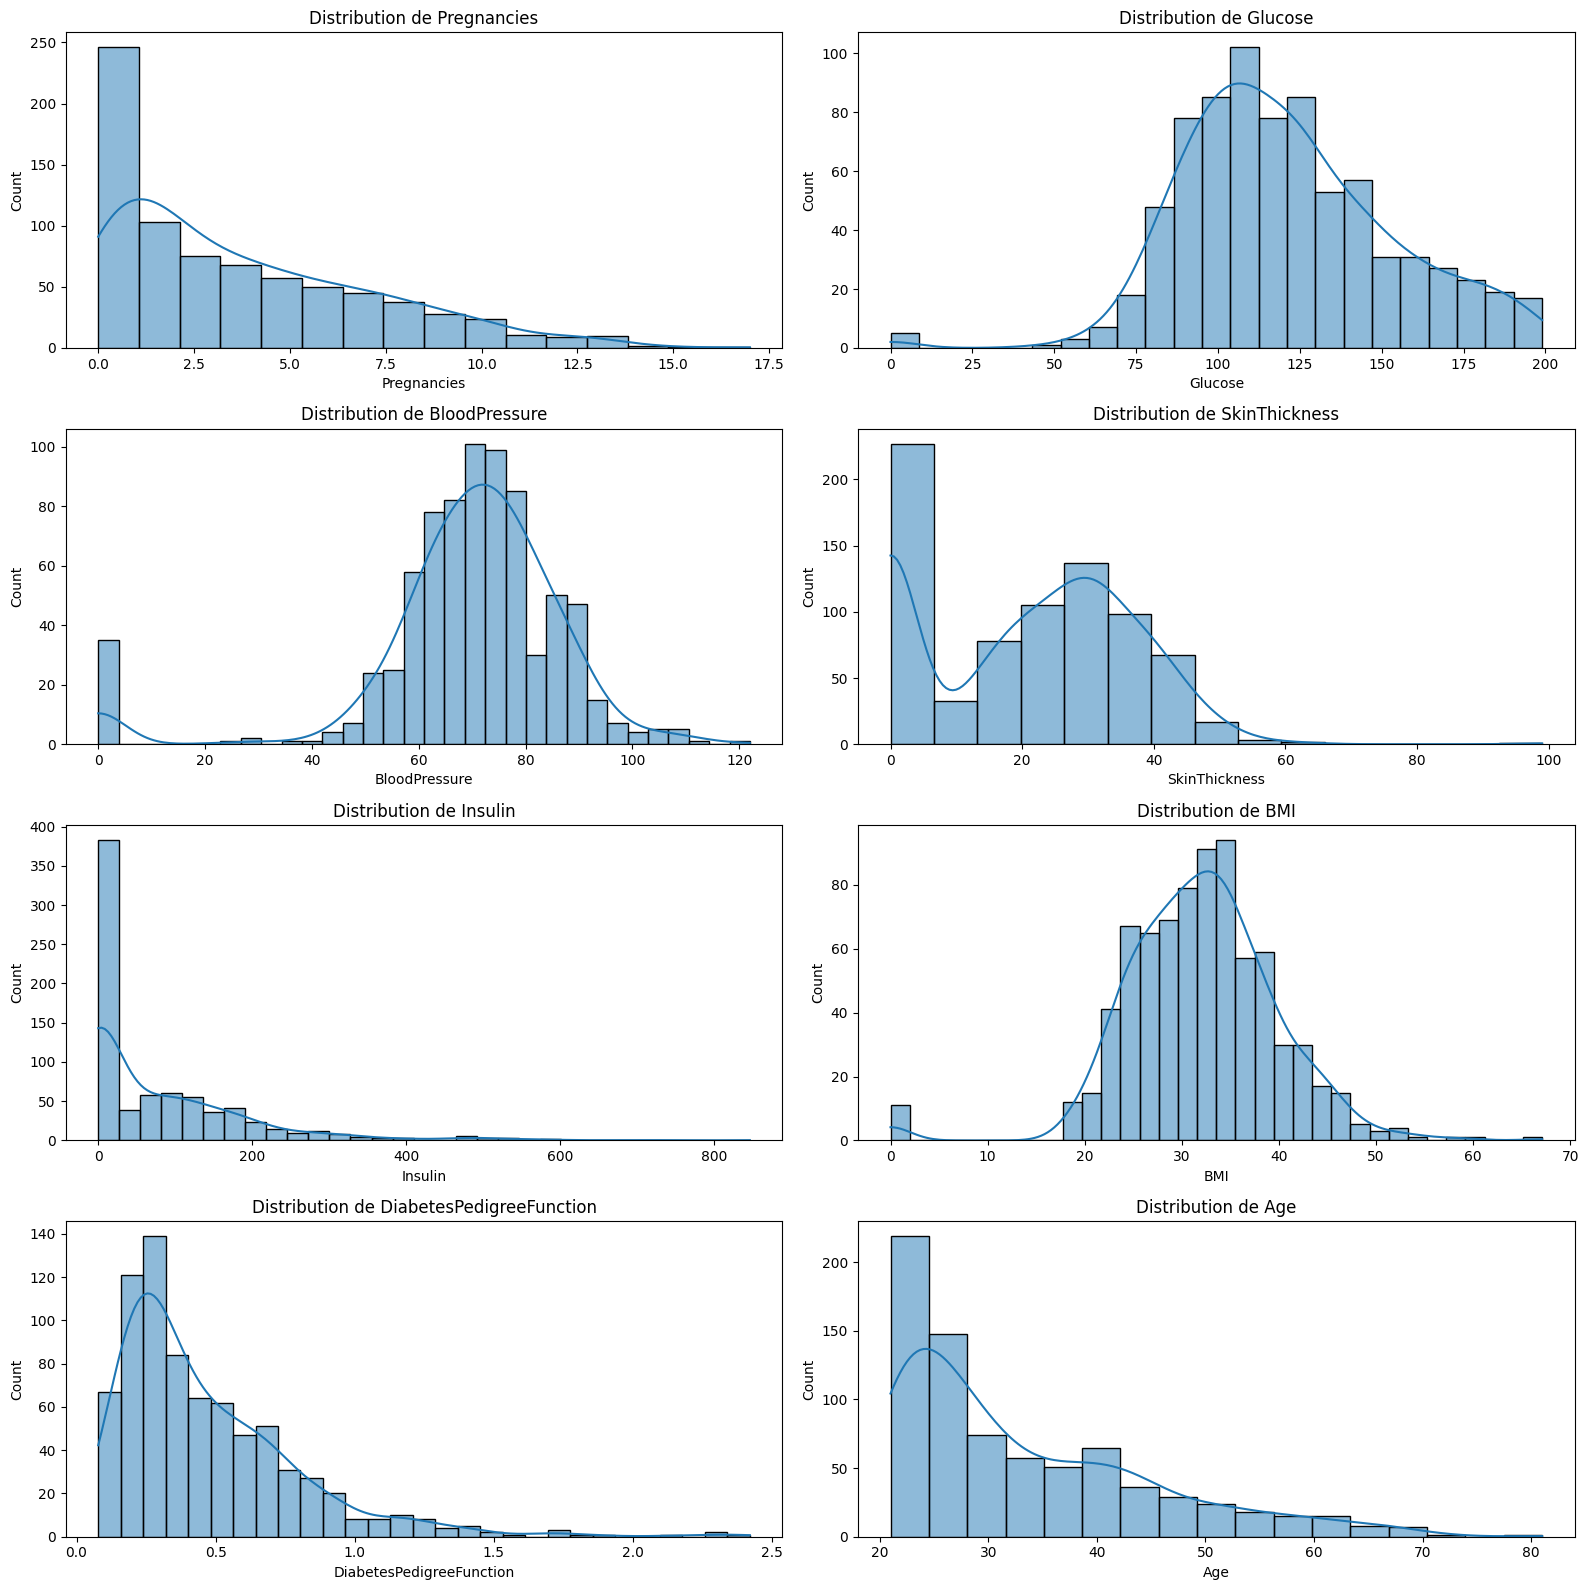

<Figure size 640x480 with 0 Axes>

In [12]:
#les histogramms de distribution 
from math import ceil  # Import the ceil function
columns= df.iloc[:,:-1].columns #Avoir les columns sans l'étiquette
fig, axes = plt.subplots(ceil(len(columns)/2),2, figsize=(16,16))
axes = axes.flatten()  # Convertit la grille 4x2 en tableau 1D de 8 éléments

for i, col in enumerate(columns):#pair index column
    sns.histplot(data=df, x=col, kde=True, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Distribution de {col}')
plt.tight_layout()
plt.show()
plt.savefig("Distribution.png", dpi=300)

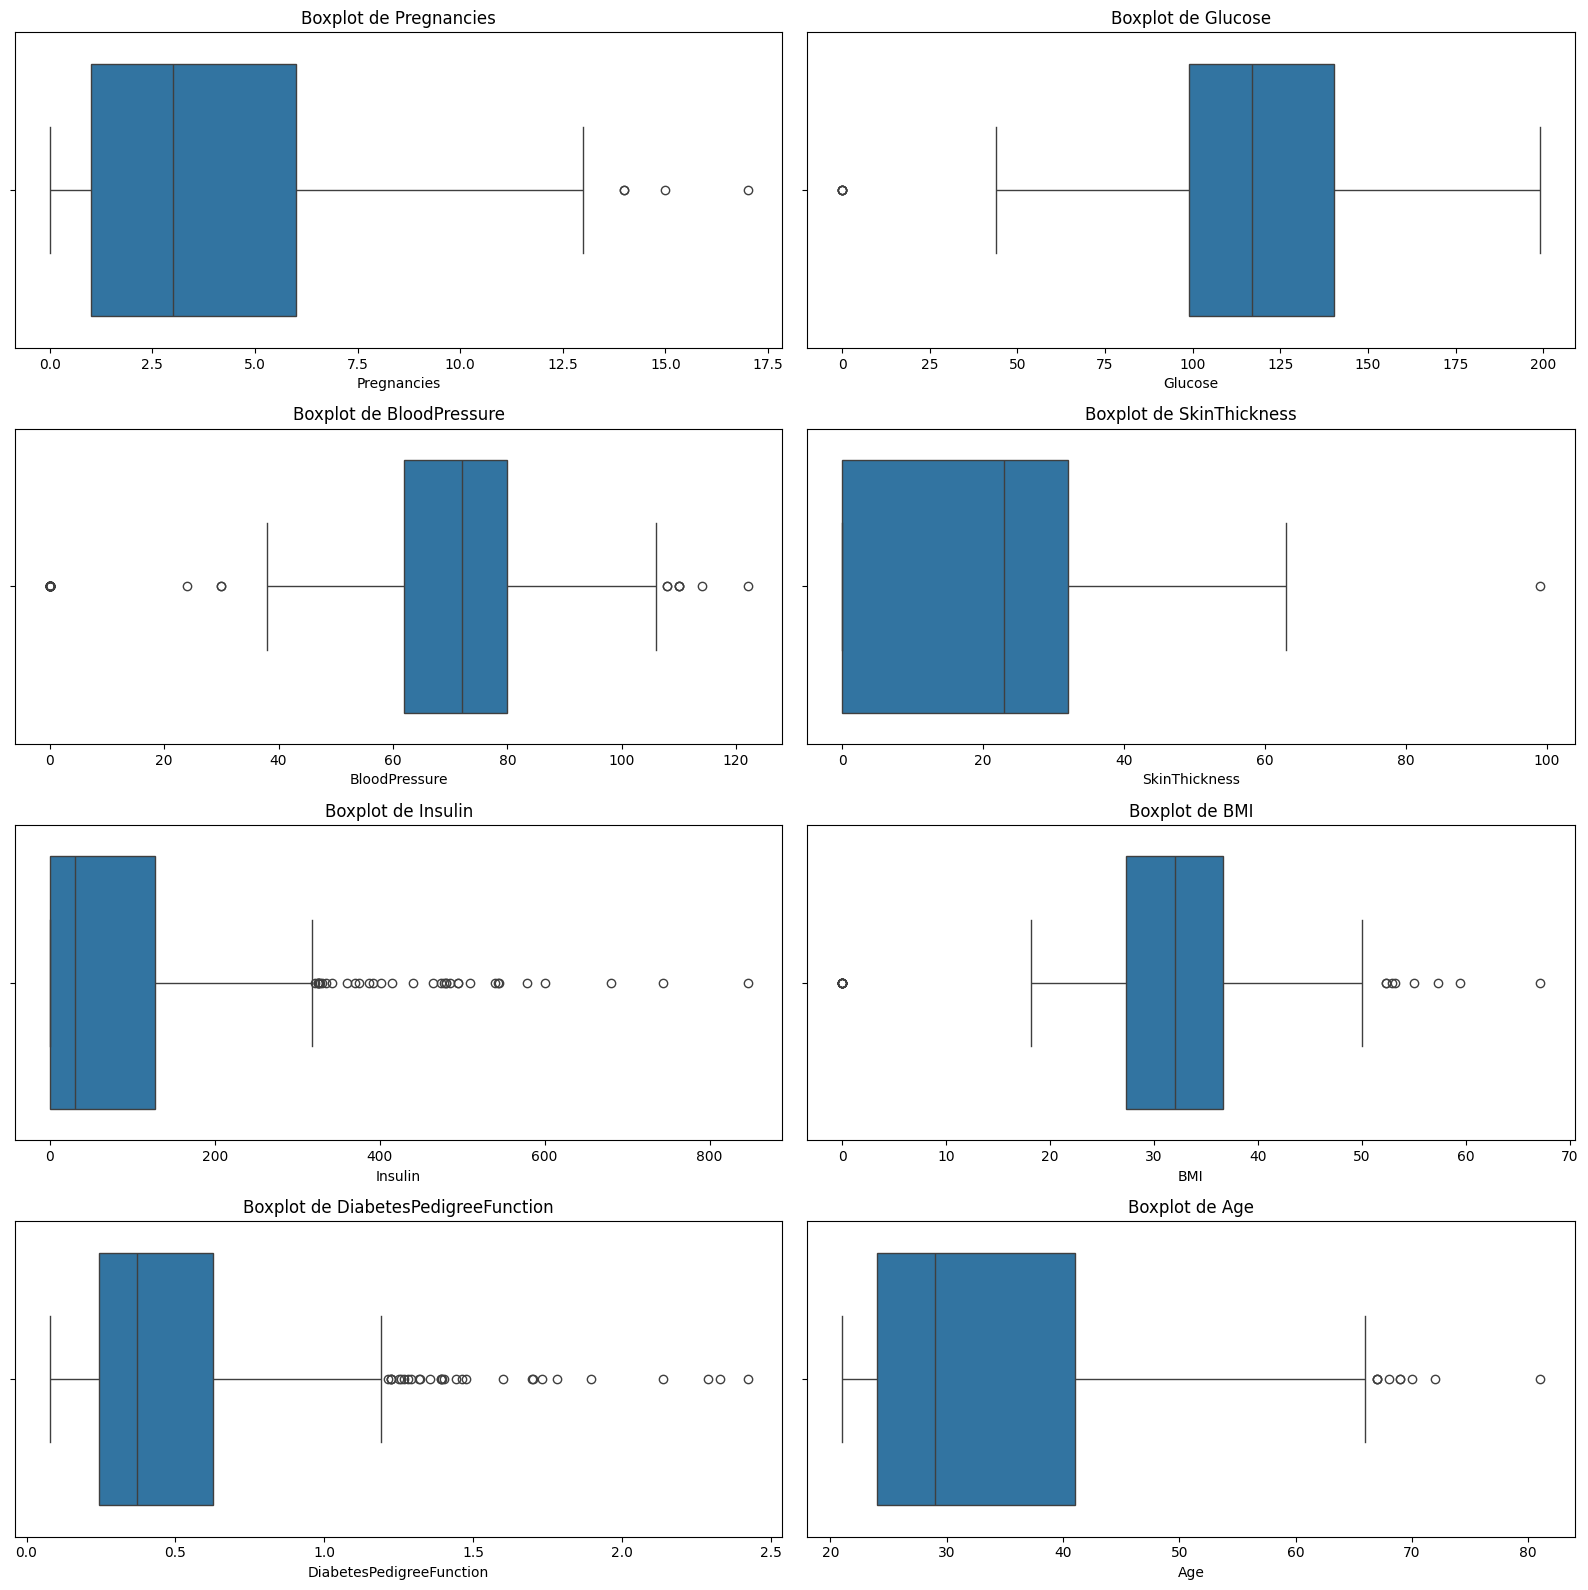

<Figure size 640x480 with 0 Axes>

In [13]:
# Pour detecter si il y a des Outliers ou non 
fig, axes = plt.subplots(ceil(len(columns)/2),2, figsize=(16,16))
axes = axes.flatten()  

for i, col in enumerate(columns):
    sns.boxplot(x = df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()
plt.savefig("Boxplot.png", dpi=300)

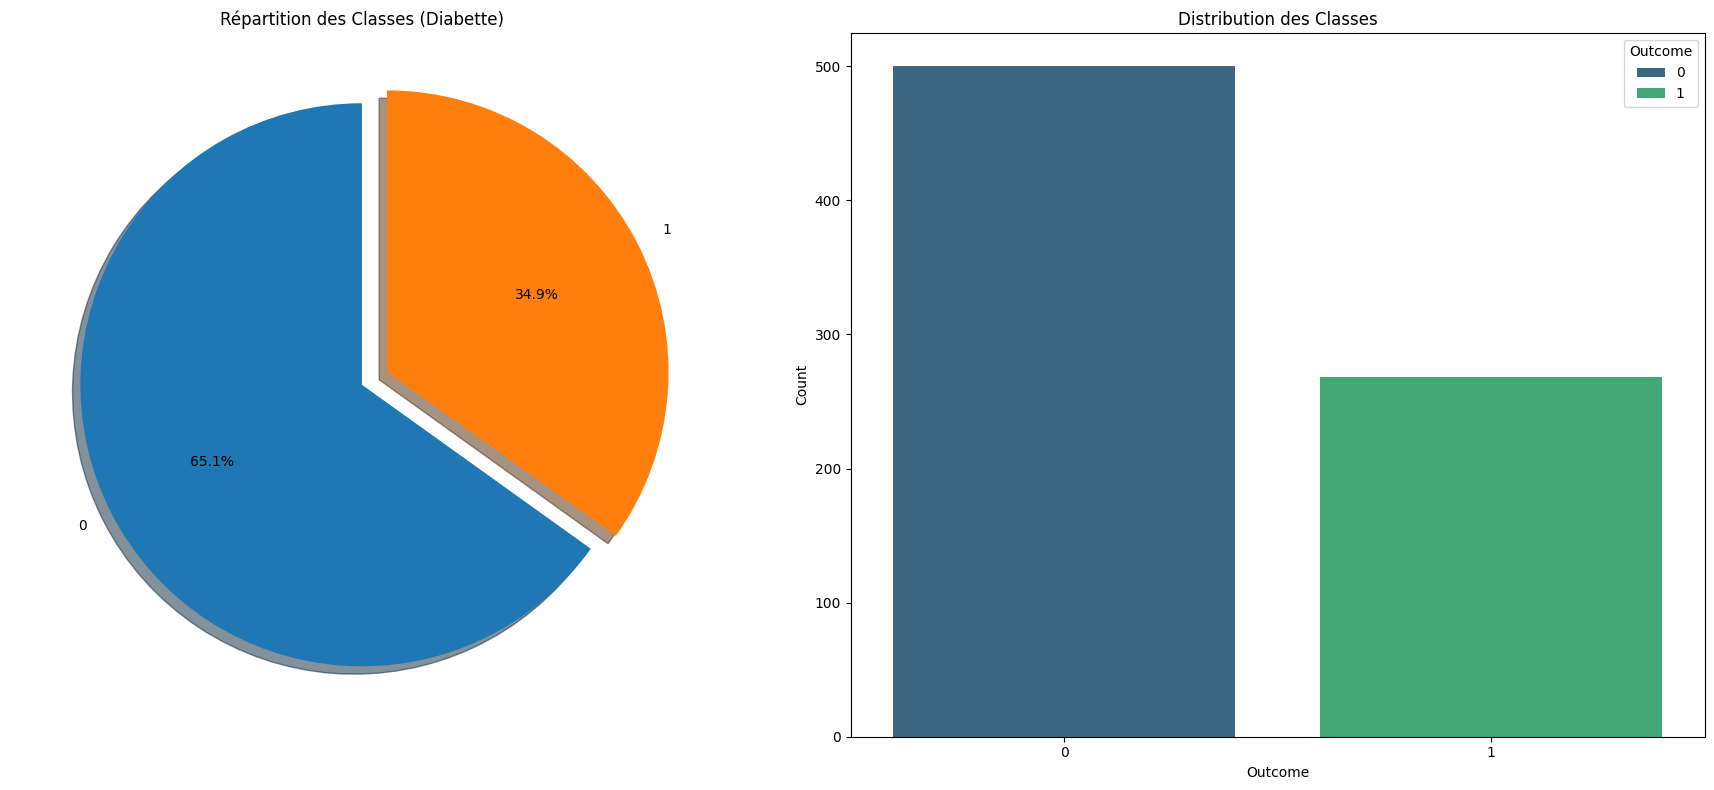

<Figure size 640x480 with 0 Axes>

In [14]:
# La ditribution de l'etiquette 
plt.figure(figsize=(18, 8))

# Première sous-figure - Camembert
plt.subplot(1, 2, 1)
df['Outcome'].value_counts().plot.pie(
    explode=[0, 0.1],#First slice (0): Not offset (stays at center),Second slice (0.1): Pulled out 10% from the center Second slice (0.1): Pulled out 10% from the center
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)
plt.title('Répartition des Classes (Diabette)')
plt.ylabel('')  # Supprime l'étiquette y inutile

# Deuxième sous-figure - Diagramme en barres
plt.subplot(1, 2, 2)
sns.countplot(x='Outcome', data=df, palette='viridis',hue='Outcome')
plt.title('Distribution des Classes')
plt.xlabel('Outcome')  # Étiquette explicite
plt.ylabel('Count')

plt.tight_layout()  # Ajuste automatiquement les espacements
plt.show()
plt.savefig("Repartition.png", dpi=300)

# DATA PREPROCESSING 

In [15]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


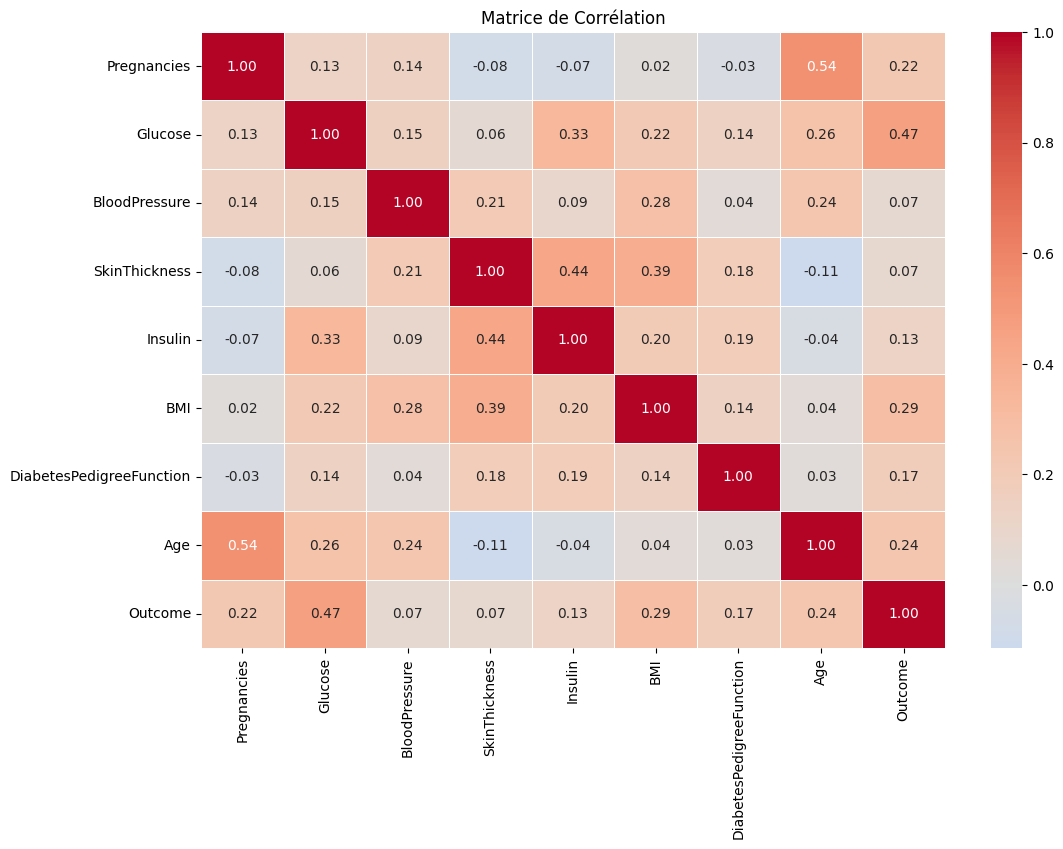

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), 
            annot=True,   # Affiche les valeurs
            fmt=".2f",   # Format à 2 décimales
            cmap='coolwarm', 
            center=0,
            linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

## Missing Values

In [17]:
"""
Lors de l'analyse préliminaire avec df.head(), nous avons remarqué que certaines caractéristiquescontenaient des 0, 
ce qui est biologiquement impossible. Ces 0 représentent en réalité des valeurs manquantes
Insuline : Il n'y a pas de valeur de 0 pour l'insuline dans le sang, car même en période de jeûne, le corps produit une certaine quantité d'insuline.
Une valeur normale pour l'insuline à jeun varie généralement entre 2 et 20 μU/mL, mais cela peut varier en fonction des laboratoires 
et des méthodes de mesure.
Pression artérielle : Une pression artérielle de 0 mmHg est impossible et serait synonyme d'absence totale de circulation sanguine, 
ce qui est incompatible avec la vie. Les valeurs normales pour la pression artérielle sont généralement inférieures à 120/80 mmHg.
Épaisseur de la peau : L'épaisseur de la peau varie selon les individus et les zones du corps.
Une valeur de 0 n'est pas possible, car même la peau la plus fine a une épaisseur mesurable.
IMC (Indice de Masse Corporelle) : L'IMC est calculé en divisant le poids en kilogrammes par le carré de la taille en mètres.
Une valeur de 0 est impossible, car cela impliquerait un poids ou une taille nulle. Les valeurs normales pour l'IMC sont généralement comprises
entre 18,5 et 24,9.
Glycémie : Une glycémie de 0 g/L est physiologiquement impossible, car même en cas d'hypoglycémie grave, 
le taux de glucose dans le sang ne descend pas à zéro. Les valeurs normales pour la glycémie à jeun se situent entre 0,70 et 1,10 g/L
"""

"\nLors de l'analyse préliminaire avec df.head(), nous avons remarqué que certaines caractéristiquescontenaient des 0, \nce qui est biologiquement impossible. Ces 0 représentent en réalité des valeurs manquantes\nInsuline : Il n'y a pas de valeur de 0 pour l'insuline dans le sang, car même en période de jeûne, le corps produit une certaine quantité d'insuline.\nUne valeur normale pour l'insuline à jeun varie généralement entre 2 et 20 μU/mL, mais cela peut varier en fonction des laboratoires \net des méthodes de mesure.\nPression artérielle : Une pression artérielle de 0 mmHg est impossible et serait synonyme d'absence totale de circulation sanguine, \nce qui est incompatible avec la vie. Les valeurs normales pour la pression artérielle sont généralement inférieures à 120/80 mmHg.\nÉpaisseur de la peau : L'épaisseur de la peau varie selon les individus et les zones du corps.\nUne valeur de 0 n'est pas possible, car même la peau la plus fine a une épaisseur mesurable.\nIMC (Indice de Ma

In [18]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = \
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.63,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.35,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.67,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.17,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.29,33,1


In [20]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [21]:
def median_column(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [22]:
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_column(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_column(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_column(i)[i][1]

In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.63,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.35,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.67,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.17,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.29,33,1


## Normalization

In [24]:
from sklearn import preprocessing
from sklearn import compose
from sklearn import impute
X=df.drop('Outcome',axis=1)
Y=df['Outcome']
scaler=preprocessing.RobustScaler()
scaled=scaler.fit_transform(X)

In [25]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [26]:
scaled

array([[ 0.6       ,  0.7654321 ,  0.        , ...,  0.17032967,
         0.66535948,  1.23529412],
       [-0.4       , -0.79012346, -0.375     , ..., -0.5989011 ,
        -0.05620915,  0.11764706],
       [ 1.        ,  1.62962963, -0.5       , ..., -0.96153846,
         0.78300654,  0.17647059],
       ...,
       [ 0.4       ,  0.09876543,  0.        , ..., -0.64285714,
        -0.33333333,  0.05882353],
       [-0.4       ,  0.22222222, -0.75      , ..., -0.21428571,
        -0.06143791,  1.05882353],
       [-0.4       , -0.59259259, -0.125     , ..., -0.18131868,
        -0.1503268 , -0.35294118]])

# Models 

## Machine learning Models

In [27]:
#Importation des biblio
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve,precision_recall_curve, classification_report, auc,accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn import metrics

In [28]:
#Separation des donnes en 80% pour l entrainement et 20% pour test
X_train, X_test, y_train, y_test = train_test_split(scaled, Y, test_size=0.2,
                                                    random_state=42)

In [29]:
results=[]

### K-NearestNeighbors sans optimisation

In [30]:
#Créer le modèle KNN
# Définir les hyperparamètres à tester pour KNN
param_gridKNN = {
'n_neighbors': [3, 5, 7, 9, 11],# nombre des voisins
'weights': ['uniform', 'distance'],
'metric': ['euclidean', 'manhattan', 'minkowski'] # Methode de calculer la distance
}
#Créer le modèle KNN
modelKNN = KNeighborsClassifier()
# Utiliser GridSearchCV pour le réglage des hyperparamètres
grid_searchKNN = GridSearchCV(estimator=modelKNN, param_grid=param_gridKNN
,cv=5,scoring='accuracy',verbose=2)

In [31]:
grid_searchKNN.fit(scaled, Y)
# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_searchKNN.best_params_)
# Utiliser les meilleurs hyperparamètres pour créer le modèle final
best_modelKNN = grid_searchKNN.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, we

In [32]:
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(best_modelKNN, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
best_modelKNN.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [33]:
# Prédire sur l'ensemble de test
y_pred_test = best_modelKNN.predict(X_test)
y_pred_train = best_modelKNN.predict(X_train)
#Prediction des probabiliter
y_pred_proba_test = best_modelKNN.predict_proba(X_test)[:,1]
y_pred_proba_train = best_modelKNN.predict_proba(X_train)[:,1]

In [34]:
'''
 ** Objectif : Évaluer la capacité du modèle à distinguer les classes.
 ** L'axe des X représente le Taux de Faux Positifs (FPR) : plus on va à droite, 
    plus le modèle fait d'erreurs en prédisant 1 au lieu de 0
 ** L'axe des Y représente le Taux de Vrais Positifs (TPR) : plus on monte, 
    plus le modèle identifie correctement la classe 1.
 ** Plus la courbe est éloignée de la diagonale rouge, meilleur est le modèle.
 ** L’AUC (Area Under Curve) doit être proche de 1
'''

"\n ** Objectif : Évaluer la capacité du modèle à distinguer les classes.\n ** L'axe des X représente le Taux de Faux Positifs (FPR) : plus on va à droite, \n    plus le modèle fait d'erreurs en prédisant 1 au lieu de 0\n ** L'axe des Y représente le Taux de Vrais Positifs (TPR) : plus on monte, \n    plus le modèle identifie correctement la classe 1.\n ** Plus la courbe est éloignée de la diagonale rouge, meilleur est le modèle.\n ** L’AUC (Area Under Curve) doit être proche de 1\n"

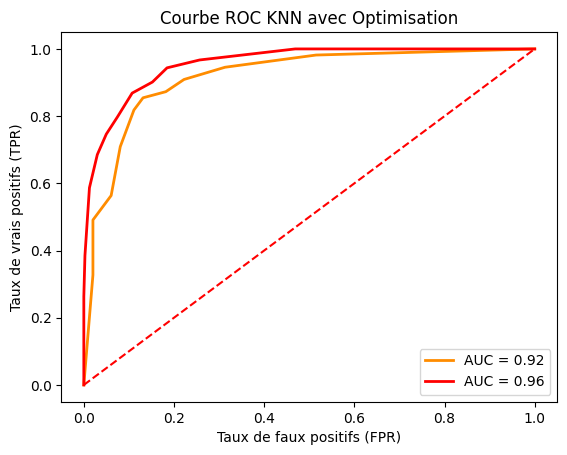

In [35]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_train,tpr_train)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC KNN avec Optimisation')
plt.show()

In [36]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
accuarncy_train=metrics.accuracy_score(y_train, y_pred_train)
preceision=precision_score(y_test, y_pred_test)
recall=recall_score(y_test, y_pred_test)
f1_score=f1_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [37]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
print("Rapport de classification :")
print(report)
metrics_rf = {
    'Algorithme': 'KNN',
    'Accuracy': round(accuracy*100,2),
    'Accuracy train': round(accuarncy_train*100,2),
    'Precision': round(preceision*100,2),
    'Recall': round(recall*100,2),
    'F1-Score': round(f1_score*100,2),
    'Validation croise': round(cv_scores.mean()*100,2),
    'AUC':roc_auc_test
}
results.append(metrics_rf)

Scores de validation croisée : [0.87012987 0.88311688 0.87662338 0.86928105 0.85620915]
Précision moyenne de la validation croisée : 87.11%
Précision globale sur l'ensemble de test : 86.36%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.90      0.89      0.89        99
           1       0.80      0.82      0.81        55

    accuracy                           0.86       154
   macro avg       0.85      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154



In [38]:
print(conf_matrix)

[[88 11]
 [10 45]]


<Axes: >

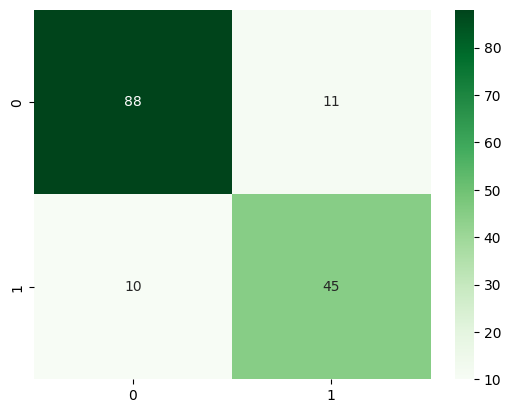

In [39]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### Régression logistique

Creation de modele

In [40]:
# Définir la grille d'hyperparamètres à tester
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],        # Inverse de la force de régularisation
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithme d'optimisation
    'class_weight': [None, 'balanced']           # Poids des classes en cas de déséquilibre
}
modelLR = LogisticRegression(max_iter=200)
# Utiliser GridSearchCV pour le réglage des hyperparamètres
grid_searchLR = GridSearchCV(estimator=modelLR, param_grid=param_grid
,cv=5,scoring='accuracy',verbose=2)

In [41]:
grid_searchLR.fit(scaled, Y)
# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_searchLR.best_params_)
# Utiliser les meilleurs hyperparamètres pour créer le modèle final
best_modelLR = grid_searchLR.best_estimator_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .......C=0.001, class_weight=None, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.001, class_weight=None, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.001, class_weight=None, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.001, class_weight=None, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.001, class_weight=None, solver=newton-cg; total time=   0.0s
[CV] END ...........C=0.001, class_weight=None, solver=lbfgs; total time=   0.0s
[CV] END ...........C=0.001, class_weight=None, solver=lbfgs; total time=   0.0s
[CV] END ...........C=0.001, class_weight=None, solver=lbfgs; total time=   0.0s
[CV] END ...........C=0.001, class_weight=None, solver=lbfgs; total time=   0.0s
[CV] END ...........C=0.001, class_weight=None, solver=lbfgs; total time=   0.0s
[CV] END .......C=0.001, class_weight=None, solver=liblinear; total time=   0.0s
[CV] END .......C=0.001, class_weight=None, sol

In [42]:
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(best_modelLR, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
best_modelLR.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight='balanced', max_iter=200,
                   solver='newton-cg')

Evaluation de modele

In [43]:
# Prédire sur l'ensemble de test
y_pred_test = best_modelLR.predict(X_test)
y_pred_train = best_modelLR.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = best_modelLR.predict_proba(X_test)[:,1]
y_pred_proba_train = best_modelLR.predict_proba(X_train)[:,1]

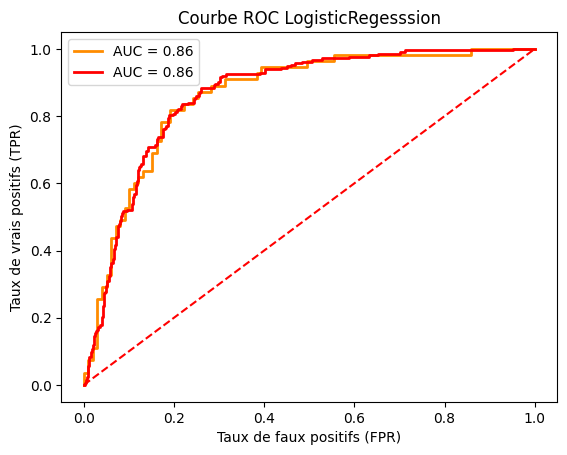

In [44]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_train,tpr_train)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC LogisticRegesssion')
plt.show()

In [45]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
accuarncy_train=metrics.accuracy_score(y_train, y_pred_train)
preceision=precision_score(y_test, y_pred_test)
recall=recall_score(y_test, y_pred_test)
f1_score=metrics.f1_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [46]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
print("Rapport de classification :")
print(report)
metrics_rf = {
    'Algorithme': 'LogisticRegesssion',
    'Accuracy': round(accuracy*100,2),
    'Accuracy train': round(accuarncy_train*100,2),
    'Precision': round(preceision*100,2),
    'Recall': round(recall*100,2),
    'F1-Score': round(f1_score*100,2),
    'Validation croise': round(cv_scores.mean()*100,2),
    'AUC':roc_auc_test
}
results.append(metrics_rf)

Scores de validation croisée : [0.82467532 0.78571429 0.81168831 0.83006536 0.77124183]
Précision moyenne de la validation croisée : 80.47%
Précision globale sur l'ensemble de test : 78.57%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        99
           1       0.65      0.85      0.74        55

    accuracy                           0.79       154
   macro avg       0.78      0.80      0.78       154
weighted avg       0.81      0.79      0.79       154



In [47]:
print(conf_matrix)

[[74 25]
 [ 8 47]]


<Axes: >

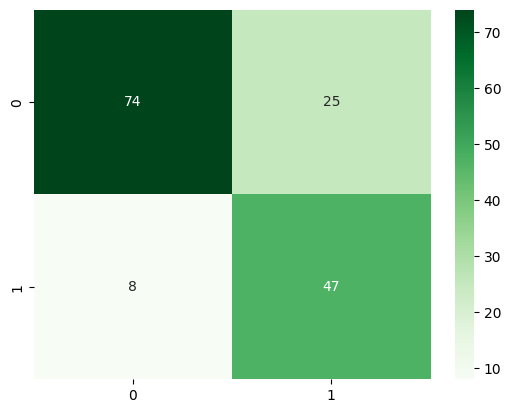

In [48]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### Decision tree  

In [49]:
# Définition de la grille de paramètres pour GridSearchCV
param_grid = {
'criterion': ['gini', 'entropy'],
'max_depth': [3, 5, 7, None],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}
#Initialisation de GridSearchCV avec DecisionTreeClassifier
grid_searchDT = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid, 
                             cv=5, scoring='accuracy',verbose=2)

In [50]:
grid_searchDT.fit(scaled, Y)
# Meilleurs paramètres
print("Meilleurs paramètres : ", grid_searchDT.best_params_)
# Entraînement final avec les meilleurs paramètres
best_modelDT = grid_searchDT.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1

In [51]:
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(best_modelDT, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
best_modelDT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [52]:
# Prédire sur l'ensemble de test
y_pred_test = best_modelDT.predict(X_test)
y_pred_train = best_modelDT.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = best_modelDT.predict_proba(X_test)[:,1]
y_pred_proba_train = best_modelDT.predict_proba(X_train)[:,1]

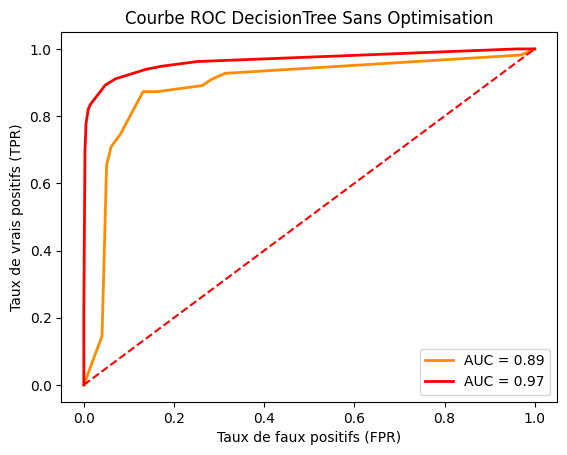

In [53]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_train,tpr_train)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC DecisionTree Sans Optimisation')
plt.show()

In [54]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
accuarncy_train=metrics.accuracy_score(y_train, y_pred_train)
preceision=precision_score(y_test, y_pred_test)
recall=recall_score(y_test, y_pred_test)
f1_score=metrics.f1_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [55]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
print("Rapport de classification :")
print(report)
metrics_rf = {
    'Algorithme': 'DecisionTree',
    'Accuracy': round(accuracy*100,2),
    'Accuracy train': round(accuarncy_train*100,2),
    'Precision': round(preceision*100,2),
    'Recall': round(recall*100,2),
    'F1-Score': round(f1_score*100,2),
    'Validation croise': round(cv_scores.mean()*100,2),
    'AUC':roc_auc_test
}
results.append(metrics_rf)

Scores de validation croisée : [0.86363636 0.88311688 0.88311688 0.89542484 0.90849673]
Précision moyenne de la validation croisée : 88.68%
Précision globale sur l'ensemble de test : 85.71%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        99
           1       0.84      0.75      0.79        55

    accuracy                           0.86       154
   macro avg       0.85      0.83      0.84       154
weighted avg       0.86      0.86      0.86       154



In [56]:
print(conf_matrix)

[[91  8]
 [14 41]]


<Axes: >

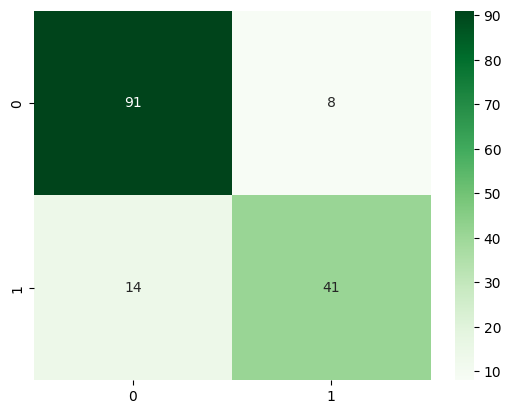

In [57]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### Support Vector Machines sans Optimisation

In [58]:
# Définir les hyperparamètres à tester pour SVC
param_grid = {
'C': [0.1, 1, 10],
'gamma': ['scale', 'auto'],
'kernel': ['rbf', 'linear']
}
# Créer le modèle SVC
modelSVC = SVC(probability=True)
# Utiliser GridSearchCV pour le réglage des hyperparamètres
grid_searchSVC = GridSearchCV(estimator=modelSVC, param_grid=param_grid, cv=5,
                           scoring='accuracy',verbose=2)

In [59]:
grid_searchSVC.fit(scaled, Y)
# Meilleurs paramètres
print("Meilleurs paramètres : ", grid_searchSVC.best_params_)
# Entraînement final avec les meilleurs paramètres
best_modelSVC = grid_searchSVC.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto

In [60]:
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(best_modelSVC, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
best_modelSVC.fit(X_train, y_train)

SVC(C=10, probability=True)

In [61]:
# Prédire sur l'ensemble de test
y_pred_test = best_modelSVC.predict(X_test)
y_pred_train = best_modelSVC.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = best_modelSVC.predict_proba(X_test)[:,1]
y_pred_proba_train = best_modelSVC.predict_proba(X_train)[:,1]

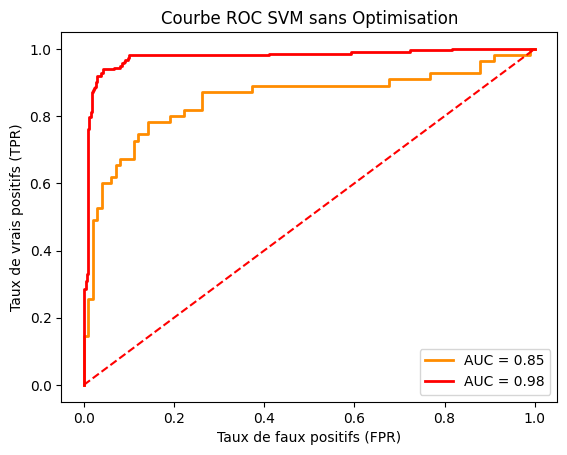

In [62]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_train,tpr_train)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC SVM sans Optimisation')
plt.show()

In [63]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
accuarncy_train=metrics.accuracy_score(y_train, y_pred_train)
preceision=precision_score(y_test, y_pred_test)
recall=recall_score(y_test, y_pred_test)
f1_score=metrics.f1_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [64]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
print("Rapport de classification :")
print(report)
metrics_rf = {
    'Algorithme': 'SVM',
    'Accuracy': round(accuracy*100,2),
    'Accuracy train': round(accuarncy_train*100,2),
    'Precision': round(preceision*100,2),
    'Recall': round(recall*100,2),
    'F1-Score': round(f1_score*100,2),
    'Validation croise': round(cv_scores.mean()*100,2),
    'AUC':roc_auc_test
}
results.append(metrics_rf)

Scores de validation croisée : [0.83116883 0.87012987 0.85064935 0.85620915 0.88888889]
Précision moyenne de la validation croisée : 85.94%
Précision globale sur l'ensemble de test : 82.47%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        99
           1       0.77      0.73      0.75        55

    accuracy                           0.82       154
   macro avg       0.81      0.80      0.81       154
weighted avg       0.82      0.82      0.82       154



In [65]:
print(conf_matrix)

[[87 12]
 [15 40]]


<Axes: >

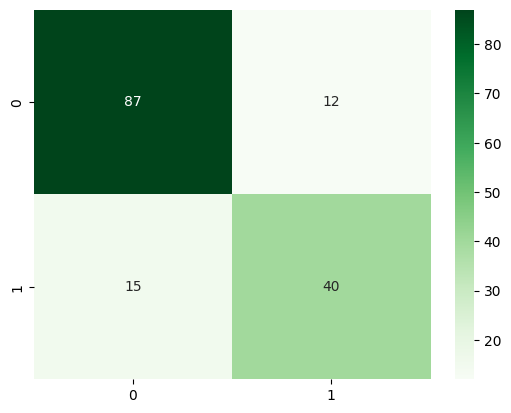

In [66]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### Random forest sans optimisation

In [67]:
#Créer le modèle Randomforest
# Définir les hyperparamètres à tester pour Random Forest
param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [4,6,None],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
}
# Créer le modèle Random Forest
modelRDF = RandomForestClassifier(random_state=42)
# Utiliser GridSearchCV pour le réglage des hyperparamètres
grid_searchRDF = GridSearchCV(estimator=modelRDF, param_grid=param_grid, cv=5,
                           scoring='accuracy',verbose=2)

In [68]:
grid_searchRDF.fit(scaled, Y)
# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_searchRDF.best_params_)
# Utiliser les meilleurs hyperparamètres pour créer le modèle final
best_modelRDF = grid_searchRDF.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=1, m

In [69]:
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(best_modelRDF, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
best_modelRDF.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [70]:
# Prédire sur l'ensemble de test
y_pred_test = best_modelRDF.predict(X_test)
y_pred_train = best_modelRDF.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = best_modelRDF.predict_proba(X_test)[:,1]
y_pred_proba_train = best_modelRDF.predict_proba(X_train)[:,1]

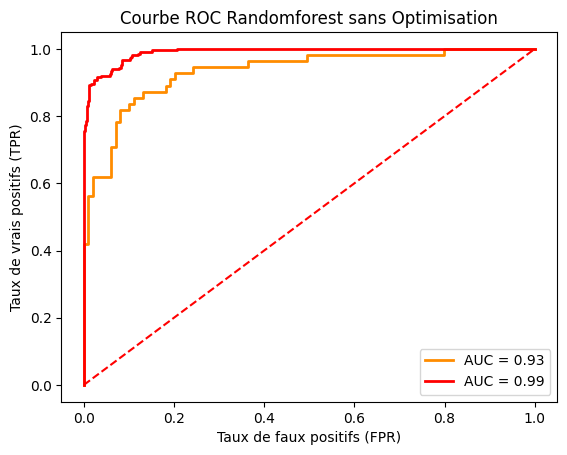

In [71]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_train,tpr_train)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC Randomforest sans Optimisation')
plt.show()

In [72]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
accuarncy_train=metrics.accuracy_score(y_train, y_pred_train)
preceision=precision_score(y_test, y_pred_test)
recall=recall_score(y_test, y_pred_test)
f1_score=metrics.f1_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [73]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
print("Rapport de classification :")
print(report)
metrics_rf = {
    'Algorithme': 'Randomforest',
    'Accuracy': round(accuracy*100,2),
    'Accuracy train': round(accuarncy_train*100,2),
    'Precision': round(preceision*100,2),
    'Recall': round(recall*100,2),
    'F1-Score': round(f1_score*100,2),
    'Validation croise': round(cv_scores.mean()*100,2),
    'AUC':roc_auc_test
}
results.append(metrics_rf)

Scores de validation croisée : [0.88311688 0.86363636 0.87012987 0.91503268 0.90196078]
Précision moyenne de la validation croisée : 88.68%
Précision globale sur l'ensemble de test : 87.01%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        99
           1       0.80      0.85      0.82        55

    accuracy                           0.87       154
   macro avg       0.86      0.87      0.86       154
weighted avg       0.87      0.87      0.87       154



In [74]:
print(conf_matrix)

[[87 12]
 [ 8 47]]


<Axes: >

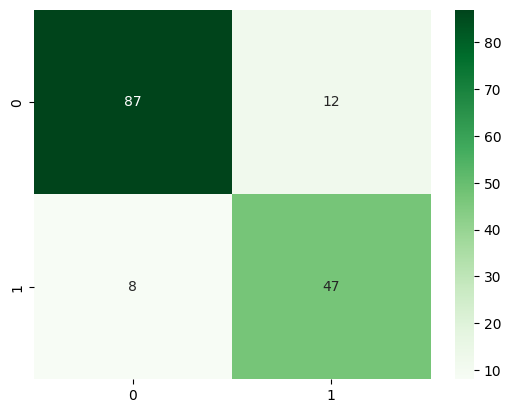

In [75]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### Naive Bayes

In [76]:
from sklearn.naive_bayes import GaussianNB

In [77]:
# Créer le modèle Naive Bayes Gaussien
modelNB = GaussianNB()

In [78]:
# Utiliser StratifiedKFold pour maintenir les proportions de classe dans␣chaque fold
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(modelNB, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
modelNB.fit(X_train, y_train)

GaussianNB()

In [79]:
# Prédire sur l'ensemble de test
y_pred_test = modelNB.predict(X_test)
y_pred_train = modelNB.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = modelNB.predict_proba(X_test)[:,1]
y_pred_proba_train = modelNB.predict_proba(X_train)[:,1]

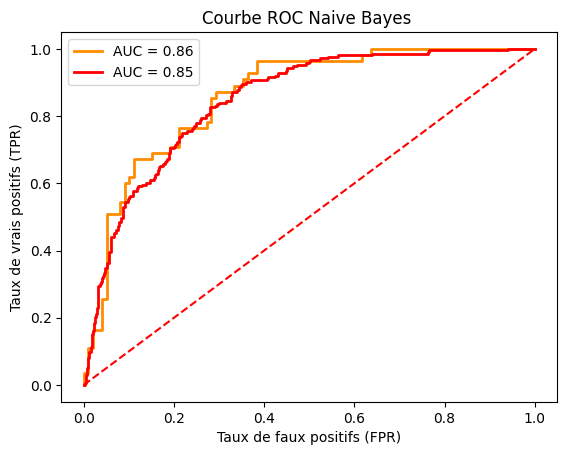

In [80]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_train,tpr_train)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC Naive Bayes ')
plt.show()

In [81]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
accuarncy_train=metrics.accuracy_score(y_train, y_pred_train)
preceision=precision_score(y_test, y_pred_test)
recall=recall_score(y_test, y_pred_test)
f1_score=metrics.f1_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [82]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
print("Rapport de classification :")
print(report)
metrics_rf = {
    'Algorithme': 'Naive Bayes',
    'Accuracy': round(accuracy*100,2),
    'Accuracy train': round(accuarncy_train*100,2),
    'Precision': round(preceision*100,2),
    'Recall': round(recall*100,2),
    'F1-Score': round(f1_score*100,2),
    'Validation croise': round(cv_scores.mean()*100,2),
    'AUC':roc_auc_test
}
results.append(metrics_rf)

Scores de validation croisée : [0.76623377 0.74025974 0.75324675 0.82352941 0.77124183]
Précision moyenne de la validation croisée : 77.09%
Précision globale sur l'ensemble de test : 76.62%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [83]:
print(conf_matrix)

[[80 19]
 [17 38]]


<Axes: >

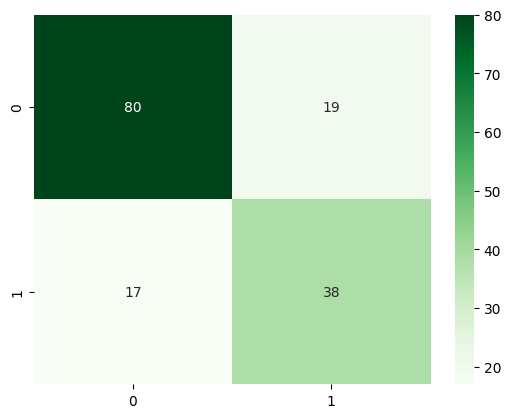

In [84]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### Gradient Boosting Classifier sans optimisation

In [85]:
#Créer le modèle Gradient Boosting
# Définir les hyperparamètres à tester pour Gradient Boosting
param_grid = {
'n_estimators': [50, 100, 200],
'learning_rate': [0.01, 0.1, 0.5, 1],
'max_depth': [3, 4, 5]
}
#Créer le modèle Gradient Boosting
modelGD = GradientBoostingClassifier()
# Utiliser GridSearchCV pour le réglage des hyperparamètres
grid_searchGD = GridSearchCV(estimator=modelGD, param_grid=param_grid,cv=5,scoring='accuracy',verbose=2)

In [86]:
grid_searchGD.fit(scaled, Y)
# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_searchGD.best_params_)
# Utiliser les meilleurs hyperparamètres pour créer le modèle final
best_modelGD = grid_searchGD.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

In [87]:
# Utiliser StratifiedKFold pour maintenir les proportions de classe dans␣chaque fold
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(best_modelGD, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
best_modelGD.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5)

In [88]:
# Prédire sur l'ensemble de test
y_pred_test = best_modelGD.predict(X_test)
y_pred_train = best_modelGD.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = best_modelGD.predict_proba(X_test)[:,1]
y_pred_proba_train = best_modelGD.predict_proba(X_train)[:,1]

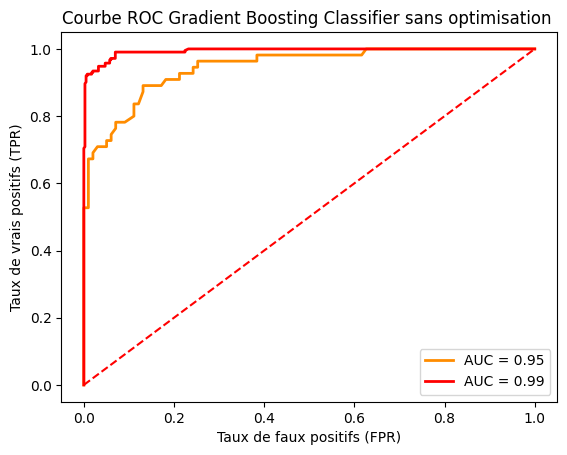

In [89]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_train,tpr_train)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC Gradient Boosting Classifier sans optimisation ')
plt.show()

In [90]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
accuarncy_train=metrics.accuracy_score(y_train, y_pred_train)
preceision=precision_score(y_test, y_pred_test)
recall=recall_score(y_test, y_pred_test)
f1_score=metrics.f1_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [91]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
print("Rapport de classification :")
print(report)
metrics_rf = {
    'Algorithme': 'Gradient Boosting Classifier',
    'Accuracy': round(accuracy*100,2),
    'Accuracy train': round(accuarncy_train*100,2),
    'Precision': round(preceision*100,2),
    'Recall': round(recall*100,2),
    'F1-Score': round(f1_score*100,2),
    'Validation croise': round(cv_scores.mean()*100,2),
    'AUC':roc_auc_test
}
results.append(metrics_rf)

Scores de validation croisée : [0.88961039 0.87662338 0.88961039 0.91503268 0.92156863]
Précision moyenne de la validation croisée : 89.85%
Précision globale sur l'ensemble de test : 85.71%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        99
           1       0.80      0.80      0.80        55

    accuracy                           0.86       154
   macro avg       0.84      0.84      0.84       154
weighted avg       0.86      0.86      0.86       154



In [92]:
print(conf_matrix)

[[88 11]
 [11 44]]


<Axes: >

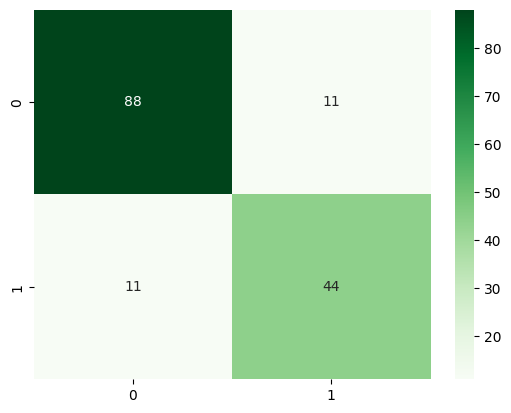

In [93]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### AdaBoost Classifier sans Optimisation

In [94]:
from sklearn.ensemble import AdaBoostClassifier

In [95]:
# Définir les hyperparamètres à tester pour Gradient Boosting
param_grid = {
'n_estimators': [50, 100, 200],
'learning_rate': [0.01, 0.1, 1, 10]
}
#Créer le modèle Gradient Boosting
modeladD = AdaBoostClassifier()
# Utiliser GridSearchCV pour le réglage des hyperparamètres
grid_searchadD = GridSearchCV(estimator=modeladD, param_grid=param_grid,
                              cv=5,scoring='accuracy',verbose=2)

In [96]:
grid_searchadD.fit(scaled, Y)
# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_searchadD.best_params_)
# Utiliser les meilleurs hyperparamètres pour créer le modèle final
best_modeladD = grid_searchadD.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.4s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.9s
[CV] END ...............learning_rate=0.01, n_es

In [97]:
# Utiliser StratifiedKFold pour maintenir les proportions de classe dans␣chaque fold
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(best_modeladD, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
best_modeladD.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [98]:
# Prédire sur l'ensemble de test
y_pred_test = best_modeladD.predict(X_test)
y_pred_train = best_modeladD.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = best_modeladD.predict_proba(X_test)[:,1]
y_pred_proba_train = best_modeladD.predict_proba(X_train)[:,1]

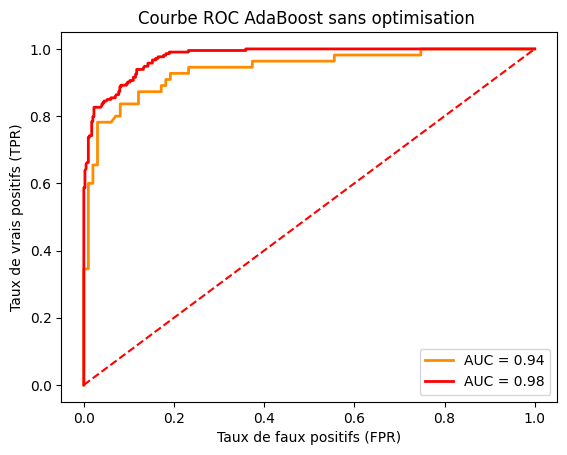

In [99]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_train,tpr_train)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC AdaBoost sans optimisation ')
plt.show()

In [100]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
accuarncy_train=metrics.accuracy_score(y_train, y_pred_train)
preceision=precision_score(y_test, y_pred_test)
recall=recall_score(y_test, y_pred_test)
f1_score=metrics.f1_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [101]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
print("Rapport de classification :")
print(report)
metrics_rf = {
    'Algorithme': 'AdaBoost',
    'Accuracy': round(accuracy*100,2),
    'Accuracy train': round(accuarncy_train*100,2),
    'Precision': round(preceision*100,2),
    'Recall': round(recall*100,2),
    'F1-Score': round(f1_score*100,2),
    'Validation croise': round(cv_scores.mean()*100,2),
    'AUC':roc_auc_test
}
results.append(metrics_rf)

Scores de validation croisée : [0.88311688 0.86363636 0.8961039  0.88888889 0.86928105]
Précision moyenne de la validation croisée : 88.02%
Précision globale sur l'ensemble de test : 86.36%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        99
           1       0.79      0.84      0.81        55

    accuracy                           0.86       154
   macro avg       0.85      0.86      0.85       154
weighted avg       0.87      0.86      0.86       154



In [102]:
print(conf_matrix)

[[87 12]
 [ 9 46]]


<Axes: >

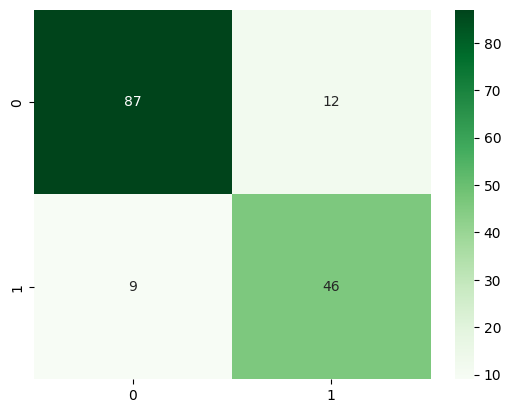

In [103]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### Bagging (Bootstrap Aggregating) sans Optimisation

In [104]:
from sklearn.ensemble import BaggingClassifier

In [105]:
#Créer le modèle Bagging
# Définition de la grille de paramètres pour GridSearchCV
param_grid = {
'n_estimators': [10, 50, 100],
'max_samples': [0.5, 0.8, 1.0],
'max_features': [0.5, 0.7, 1.0],
'bootstrap': [True, False],
'bootstrap_features': [True, False]
}
#Créer le modèle Gradient Boosting
modelBGG = BaggingClassifier()
# Utiliser GridSearchCV pour le réglage des hyperparamètres
grid_searchBGG = GridSearchCV(estimator=modelBGG, param_grid=param_grid,
                              cv=5,scoring='accuracy',verbose=2)

In [106]:
grid_searchBGG.fit(scaled, Y)
# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_searchBGG.best_params_)
# Utiliser les meilleurs hyperparamètres pour créer le modèle final
best_modelBGG = grid_searchBGG.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_est

In [107]:
# Utiliser StratifiedKFold pour maintenir les proportions de classe dans␣chaque fold
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(best_modelBGG, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
best_modelBGG.fit(X_train, y_train)

BaggingClassifier(max_features=0.5, n_estimators=100)

In [108]:
# Prédire sur l'ensemble de test
y_pred_test = best_modelBGG.predict(X_test)
y_pred_train = best_modelBGG.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = best_modelBGG.predict_proba(X_test)[:,1]
y_pred_proba_train = best_modelBGG.predict_proba(X_train)[:,1]

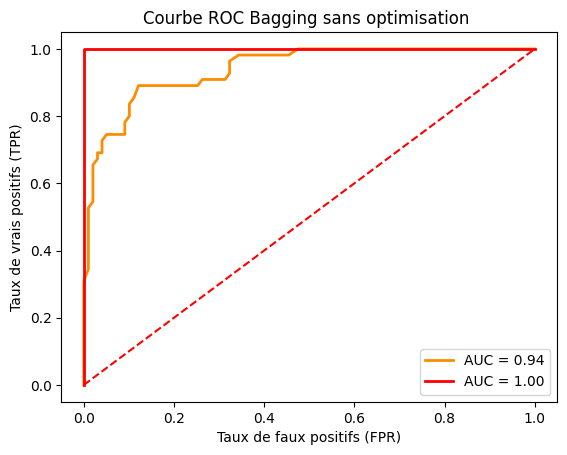

In [109]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_train,tpr_train)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC Bagging sans optimisation ')
plt.show()

In [110]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
accuarncy_train=metrics.accuracy_score(y_train, y_pred_train)
preceision=precision_score(y_test, y_pred_test)
recall=recall_score(y_test, y_pred_test)
f1_score=metrics.f1_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [111]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
print("Rapport de classification :")
print(report)
metrics_rf = {
    'Algorithme': 'Bagging',
    'Accuracy': round(accuracy*100,2),
    'Accuracy train': round(accuarncy_train*100,2),
    'Precision': round(preceision*100,2),
    'Recall': round(recall*100,2),
    'F1-Score': round(f1_score*100,2),
    'Validation croise': round(cv_scores.mean()*100,2),
    'AUC':roc_auc_test
}
results.append(metrics_rf)

Scores de validation croisée : [0.91558442 0.86363636 0.87012987 0.88235294 0.90196078]
Précision moyenne de la validation croisée : 88.67%
Précision globale sur l'ensemble de test : 87.01%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        99
           1       0.82      0.82      0.82        55

    accuracy                           0.87       154
   macro avg       0.86      0.86      0.86       154
weighted avg       0.87      0.87      0.87       154



In [112]:
print(conf_matrix)

[[89 10]
 [10 45]]


<Axes: >

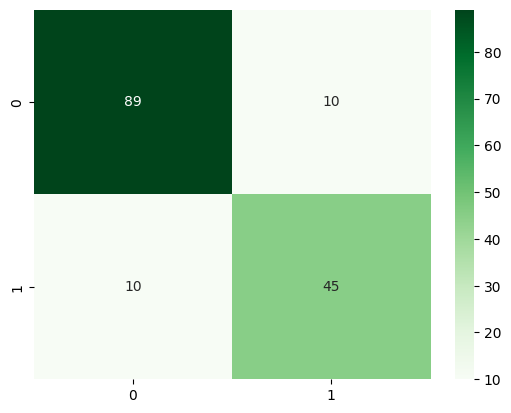

In [113]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### LGBMClassifier sans optimisation

In [114]:
import lightgbm as lgb

In [115]:
#Créer le modèle LGBMClassifier
 # Définition de la grille de paramètres pour GridSearchCV
param_grid = {
    'num_leaves':[31,50,100],
    'learning_rate':[0.01,0.1,0.5],
    'n_estimators':[20,40,100],
}
#Créer le modèle Gradient Boosting
modelLGM = lgb.LGBMClassifier()
# Utiliser GridSearchCV pour le réglage des hyperparamètres
grid_searchLGM = GridSearchCV(estimator=modelLGM, param_grid=param_grid,
                              cv=5,scoring='accuracy',verbose=2)

In [116]:
grid_searchLGM.fit(scaled, Y)
# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_searchLGM.best_params_)
# Utiliser les meilleurs hyperparamètres pour créer le modèle final
best_modelLGM = grid_searchLGM.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[CV] END .learning_rate=0.01, n_estimators=20, num_leaves=50; total time=   0.0s
[LightGBM] [Info] Number of positive: 215, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 615, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349593 -> initscore=-0.620827
[LightGBM] [Info] Start training from score -0.620827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[LightGBM] [Info] Number of positive: 215, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 615, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349593 -> initscore=-0.620827
[LightGBM] [Info] Start training from score -0.620827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.01, n_estimators=100, num_leaves=31; total time=   0.0s
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END learning_rate=0.01, n_estimators=100, num_leaves=50; total time=   0.0s
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.01, n_estimators=100, num_leaves=100; total time=   0.0s
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training fro

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END .learning_rate=0.1, n_estimators=20, num_leaves=100; total time=   0.0s
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Inf

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[LightGBM] [Info] Number of positive: 215, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 615, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349593 -> initscore=-0.620827
[LightGBM] [Info] Start training from score -0.620827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END .learning_rate=0.1, n_estimators=100, num_leaves=31; total time=   0.0s
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END .learning_rate=0.1, n_estimators=100, num_leaves=31; total time=   0.0s
[LightGBM] [Info] Number of positive: 215, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 615, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349593 -> initscore=-0.620827
[LightGBM] [Info] Start training from score -0.620827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END .learning_rate=0.1, n_estimators=100, num_leaves=50; total time=   0.0s
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 658
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END .learning_rate=0.5, n_estimators=20, num_leaves=100; total time=   0.0s
[LightGBM] [Info] Number of positive: 215, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 615, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349593 -> initscore=-0.620827
[LightGBM] [Info] Start training from score -0.620827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[CV] END ..learning_rate=0.5, n_estimators=40, num_leaves=31; total time=   0.0s
[LightGBM] [Info] Number of positive: 215, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 673
[LightGBM] [Info] Number of data points in the train set: 615, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349593 -> initscore=-0.620827
[LightGBM] [Info] Start training from score -0.620827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

[CV] END .learning_rate=0.5, n_estimators=100, num_leaves=31; total time=   0.0s
[LightGBM] [Info] Number of positive: 215, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 615, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349593 -> initscore=-0.620827
[LightGBM] [Info] Start training from score -0.620827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END .learning_rate=0.5, n_estimators=100, num_leaves=50; total time=   0.0s
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 658
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [117]:
# Utiliser StratifiedKFold pour maintenir les proportions de classe dans␣chaque fold
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(best_modelLGM, scaled, Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
best_modelLGM.fit(X_train, y_train)

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LGBMClassifier(n_estimators=20)

In [118]:
# Prédire sur l'ensemble de test
y_pred_test = best_modelLGM.predict(X_test)
y_pred_train = best_modelLGM.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = best_modelLGM.predict_proba(X_test)[:,1]
y_pred_proba_train = best_modelLGM.predict_proba(X_train)[:,1]

C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\rca_r\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


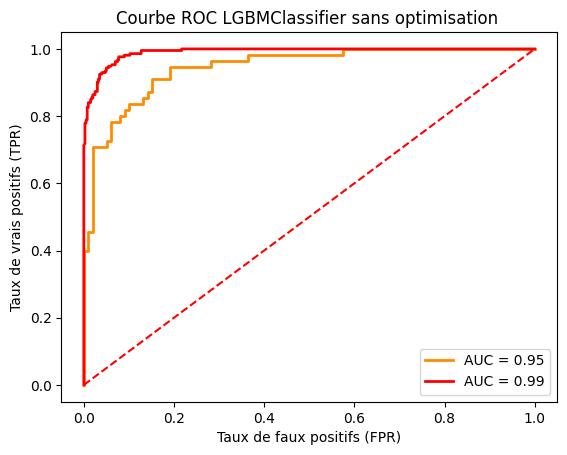

In [119]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_train,tpr_train)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC LGBMClassifier sans optimisation ')
plt.show()

In [120]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
accuarncy_train=metrics.accuracy_score(y_train, y_pred_train)
preceision=precision_score(y_test, y_pred_test)
recall=recall_score(y_test, y_pred_test)
f1_score=metrics.f1_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [121]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
print("Rapport de classification :")
print(report)
metrics_rf = {
    'Algorithme': 'LGBMClassifier',
    'Accuracy': round(accuracy*100,2),
    'Accuracy train': round(accuarncy_train*100,2),
    'Precision': round(preceision*100,2),
    'Recall': round(recall*100,2),
    'F1-Score': round(f1_score*100,2),
    'Validation croise': round(cv_scores.mean()*100,2),
    'AUC':roc_auc_test
}
results.append(metrics_rf)

Scores de validation croisée : [0.88961039 0.85064935 0.9025974  0.92156863 0.91503268]
Précision moyenne de la validation croisée : 89.59%
Précision globale sur l'ensemble de test : 86.36%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        99
           1       0.79      0.84      0.81        55

    accuracy                           0.86       154
   macro avg       0.85      0.86      0.85       154
weighted avg       0.87      0.86      0.86       154



In [122]:
print(conf_matrix)

[[87 12]
 [ 9 46]]


<Axes: >

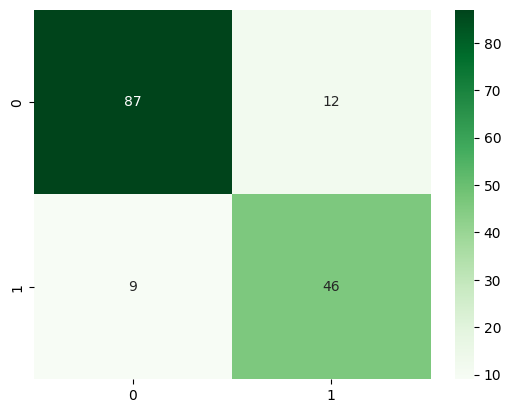

In [123]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

### XGboost sans optimisation

In [124]:
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

In [125]:
# Définition de la grille de paramètres pour GridSearchCV
param_grid = {
    'max_depth':[3,4,5,7,8],
    'learning_rate':[0.01,0.1,0.2],
    'n_estimators':[100,200,300,500,1000],
}
#Créer le modèle Gradient Boosting
modelXGB = XGBClassifier()
# Utiliser GridSearchCV pour le réglage des hyperparamètres
grid_searchXGB = GridSearchCV(estimator=modelXGB, param_grid=param_grid,
                              cv=5,scoring='accuracy',verbose=2)

In [126]:
grid_searchXGB.fit(scaled, Y)
# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres : ", grid_searchXGB.best_params_)
# Utiliser les meilleurs hyperparamètres pour créer le modèle final
best_modelXGB = grid_searchXGB.best_estimator_

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

In [127]:
# Utiliser StratifiedKFold pour maintenir les proportions de classe dans␣chaque fold
cv = StratifiedKFold(n_splits=5)
# Effectuer la validation croisée
cv_scores = cross_val_score(best_modelXGB, scaled , Y, cv=cv, scoring='accuracy')
# Entraîner le modèle sur l'ensemble d'entraînement
best_modelXGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [128]:
# Prédire sur l'ensemble de test
y_pred_test = best_modelXGB.predict(X_test)
y_pred_train = best_modelXGB.predict(X_train)

#Prediction des probabiliter
y_pred_proba_test = best_modelXGB.predict_proba(X_test)[:,1]
y_pred_proba_train = best_modelXGB.predict_proba(X_train)[:,1]

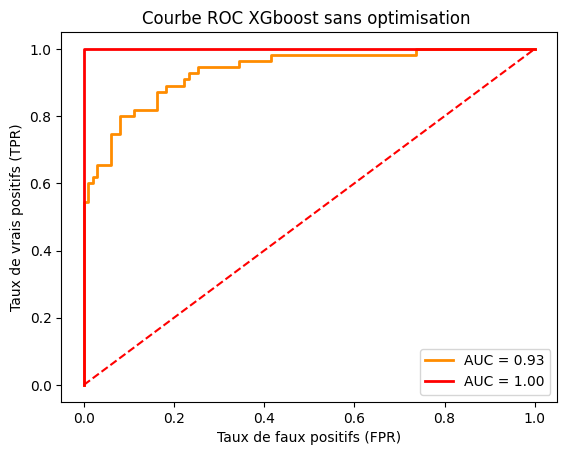

In [129]:
#Courbe ROC
fpr_test,tpr_test,_=roc_curve(y_test,y_pred_proba_test)
roc_auc_test=auc(fpr_test,tpr_test)

fpr_train,tpr_train,_=roc_curve(y_train,y_pred_proba_train)
roc_auc_train=auc(fpr_train,tpr_train)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot(fpr_train, tpr_train, color='red', lw=2, label=f'AUC = {roc_auc_train:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC XGboost sans optimisation ')
plt.show()

In [130]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
accuarncy_train=metrics.accuracy_score(y_train, y_pred_train)
preceision=precision_score(y_test, y_pred_test)
recall=recall_score(y_test, y_pred_test)
f1_score=metrics.f1_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [131]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
print("Rapport de classification :")
print(report)
metrics_rf = {
    'Algorithme': 'XGboost',
    'Accuracy': round(accuracy*100,2),
    'Accuracy train': round(accuarncy_train*100,2),
    'Precision': round(preceision*100,2),
    'Recall': round(recall*100,2),
    'F1-Score': round(f1_score*100,2),
    'Validation croise': round(cv_scores.mean()*100,2),
    'AUC':roc_auc_test
}
results.append(metrics_rf)

Scores de validation croisée : [0.87662338 0.88311688 0.87662338 0.93464052 0.92810458]
Précision moyenne de la validation croisée : 89.98%
Précision globale sur l'ensemble de test : 86.36%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.89      0.90      0.89        99
           1       0.81      0.80      0.81        55

    accuracy                           0.86       154
   macro avg       0.85      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154



In [132]:
print(conf_matrix)

[[89 10]
 [11 44]]


<Axes: >

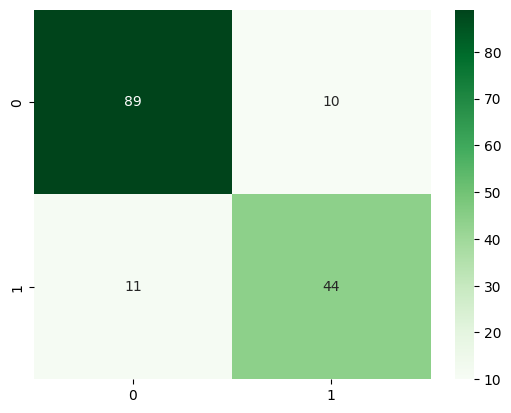

In [133]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

In [134]:
results

[{'Algorithme': 'KNN',
  'Accuracy': 86.36,
  'Accuracy train': 88.11,
  'Precision': 80.36,
  'Recall': 81.82,
  'F1-Score': 81.08,
  'Validation croise': np.float64(87.11),
  'AUC': np.float64(0.9165289256198347)},
 {'Algorithme': 'LogisticRegesssion',
  'Accuracy': 78.57,
  'Accuracy train': 80.62,
  'Precision': 65.28,
  'Recall': 85.45,
  'F1-Score': 74.02,
  'Validation croise': np.float64(80.47),
  'AUC': np.float64(0.8618916437098255)},
 {'Algorithme': 'DecisionTree',
  'Accuracy': 85.71,
  'Accuracy train': 93.32,
  'Precision': 83.67,
  'Recall': 74.55,
  'F1-Score': 78.85,
  'Validation croise': np.float64(88.68),
  'AUC': np.float64(0.8876951331496786)},
 {'Algorithme': 'SVM',
  'Accuracy': 82.47,
  'Accuracy train': 94.95,
  'Precision': 76.92,
  'Recall': 72.73,
  'F1-Score': 74.77,
  'Validation croise': np.float64(85.94),
  'AUC': np.float64(0.8501377410468319)},
 {'Algorithme': 'Randomforest',
  'Accuracy': 87.01,
  'Accuracy train': 94.95,
  'Precision': 79.66,
  'Rec

In [135]:
check=pd.DataFrame(results)

In [136]:
check

,Algorithme,Accuracy,Accuracy train,Precision,Recall,F1-Score,Validation croise,AUC
0,KNN,86.36,88.11,80.36,81.82,81.08,87.11,0.92
1,LogisticRegesssion,78.57,80.62,65.28,85.45,74.02,80.47,0.86
2,DecisionTree,85.71,93.32,83.67,74.55,78.85,88.68,0.89
3,SVM,82.47,94.95,76.92,72.73,74.77,85.94,0.85
4,Randomforest,87.01,94.95,79.66,85.45,82.46,88.68,0.93
5,Naive Bayes,76.62,76.71,66.67,69.09,67.86,77.09,0.86
6,Gradient Boosting Classifier,85.71,96.25,80.00,80.00,80.00,89.85,0.95
7,AdaBoost,86.36,91.37,79.31,83.64,81.42,88.02,0.94
8,Bagging,87.01,100.00,81.82,81.82,81.82,88.67,0.94
9,LGBMClassifier,86.36,93.97,79.31,83.64,81.42,89.59,0.95


## Deep learning 

In [137]:
#https://www.mecs-press.org/ijieeb/ijieeb-v11-n2/IJIEEB-V11-N2-3.pdf /pour les layers

### ANN

In [138]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [139]:
## Ajoutement des donnees

In [140]:
df2=pd.read_csv('Data/diabetesFRLEARN.csv')

In [141]:
df1=pd.concat([df, df2], ignore_index=True)

In [142]:
X2=df1.drop('Outcome',axis=1)
Y2=df1['Outcome']

In [143]:
X2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = X2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [144]:
columns2 = X2.columns
for i in columns2:
    median_column(i)
    X2.loc[(df1['Outcome'] == 0 ) & (X2[i].isnull()), i] = median_column(i)[i][0]
    X2.loc[(df1['Outcome'] == 1 ) & (X2[i].isnull()), i] = median_column(i)[i][1]

In [145]:
X2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.63,50
1,1,85.0,66.0,29.0,102.5,26.6,0.35,31
2,8,183.0,64.0,32.0,169.5,23.3,0.67,32
3,1,89.0,66.0,23.0,94.0,28.1,0.17,21
4,0,137.0,40.0,35.0,168.0,43.1,2.29,33
...,...,...,...,...,...,...,...,...
2763,2,75.0,64.0,24.0,55.0,29.7,0.37,33
2764,8,179.0,72.0,42.0,130.0,32.7,0.72,36
2765,6,85.0,78.0,27.0,102.5,31.2,0.38,42
2766,0,129.0,110.0,46.0,130.0,67.1,0.32,26


In [146]:
scaler2=preprocessing.RobustScaler()
scaled2=scaler.fit_transform(X2)

In [147]:
scaled2

array([[ 0.6       ,  0.73809524,  0.        , ...,  0.14364641,
         0.66315789,  1.3125    ],
       [-0.4       , -0.76190476, -0.375     , ..., -0.62983425,
        -0.06315789,  0.125     ],
       [ 1.        ,  1.57142857, -0.5       , ..., -0.99447514,
         0.78157895,  0.1875    ],
       ...,
       [ 0.6       , -0.76190476,  0.375     , ..., -0.12154696,
         0.01842105,  0.8125    ],
       [-0.6       ,  0.28571429,  2.375     , ...,  3.84530387,
        -0.14736842, -0.1875    ],
       [-0.2       , -0.85714286,  0.        , ..., -0.24309392,
         0.45263158, -0.25      ]])

#### Separation des donnes

In [148]:
# 1. Séparer d'abord 70% pour l'entraînement et 30% pour validation+test
X_train, X_temp, Y_train, Y_temp = train_test_split(scaled2, Y2, test_size=0.30, random_state=42)
# 2. Diviser ensuite X_temp en deux parties égales : 15% validation, 15% test
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.50, random_state=42)  # 50% de 30% = 15%
# Afficher les tailles pour vérifier
print(f"X_train shape: {X_train.shape}")  # 70%
print(f"X_val shape: {X_val.shape}")      # 15%
print(f"X_test shape: {X_test.shape}")    # 15%

X_train shape: (1937, 8)
X_val shape: (415, 8)
X_test shape: (416, 8)


#### Initialisation de l'ANN

In [149]:
modelANN = tf.keras.models.Sequential()

In [150]:
#modelANN.add(tf.keras.layers.Dense(units=12, activation='relu'))
#modelANN.add(Dropout(0.3))#Pour eviter maximuml'overfitting

In [151]:
#model.add(tf.keras.layers.Dense(units=14, activation='relu')) 

In [152]:
modelANN.add(tf.keras.layers.Dense(units=16, activation='relu'))#C'est la premier couche cachée
modelANN.add(Dropout(0.3))#Pour eviter maximum l'overfitting

In [153]:
modelANN.add(tf.keras.layers.Dense(units=14, activation='relu'))#C'est la deucieme couche cachée

In [154]:
modelANN.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))#C'est la  couche de sortie

In [155]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
modelANN.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [156]:
#model.add(tf.keras.layers.Dense(units=14, activation='relu')) #C'est la premier couche cachée

#### Entraîner l'ANN sur l'ensemble d'entraînement

In [157]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
historique = modelANN.fit(X_train.astype('float32'), Y_train, validation_data=(X_val.astype('float32'), Y_val), 
                          batch_size = 16, epochs = 40,callbacks=[early_stop] ,verbose=1)

Epoch 1/40
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5415 - loss: 0.6927 - val_accuracy: 0.7687 - val_loss: 0.5397
Epoch 2/40
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7466 - loss: 0.5504 - val_accuracy: 0.8048 - val_loss: 0.4422
Epoch 3/40
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7750 - loss: 0.4778 - val_accuracy: 0.8313 - val_loss: 0.4000
Epoch 4/40
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7918 - loss: 0.4459 - val_accuracy: 0.8361 - val_loss: 0.3772
Epoch 5/40
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8036 - loss: 0.4218 - val_accuracy: 0.8506 - val_loss: 0.3634
Epoch 6/40
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8323 - loss: 0.3989 - val_accuracy: 0.8482 - val_loss: 0.3508
Epoch 7/40
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8232 - loss: 0.4138 - val_accuracy: 0.8554 - val_loss: 0.3432
Epoch 8/40
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8071 - loss: 0.4306 - val_accuracy: 0.

#### Réaliser les prédictions

In [158]:
# Prédire les résultats de l'ensemble de tests
Y_pred_proba = modelANN.predict(X_test.astype('float32'))
Y_pred = (Y_pred_proba > 0.5).astype(int)  # Convertit True/False en 1/0

Y_pred_train_proba = modelANN.predict(X_train.astype('float32'))
Y_pred_train = (Y_pred_train_proba > 0.5).astype(int)  # Convertit True/False en 1/0

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


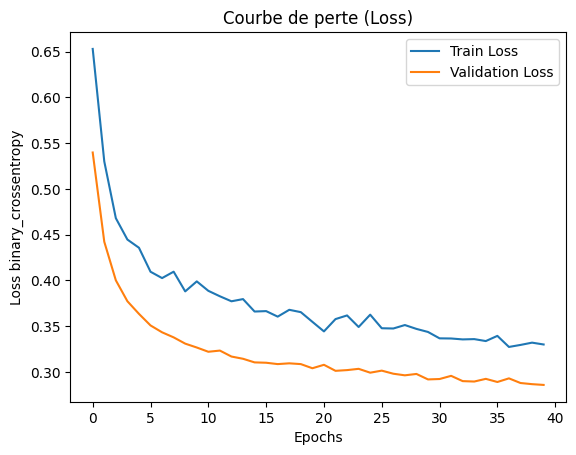

In [159]:
plt.plot(historique.history['loss'], label='Train Loss')
plt.plot(historique.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss binary_crossentropy')
plt.legend()
plt.title('Courbe de perte (Loss)')
plt.show()

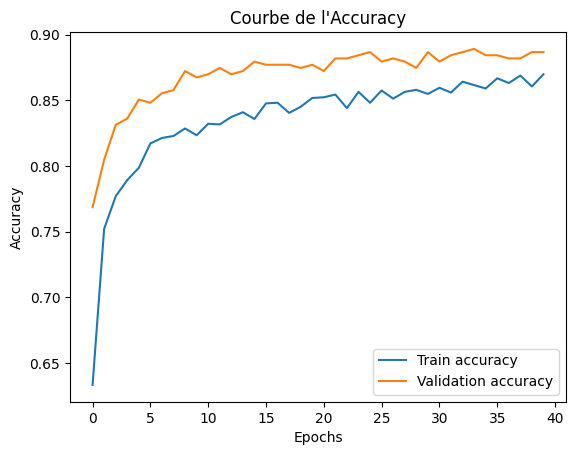

In [160]:
plt.plot(historique.history['accuracy'], label='Train accuracy')
plt.plot(historique.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Courbe de l'Accuracy")
plt.show()

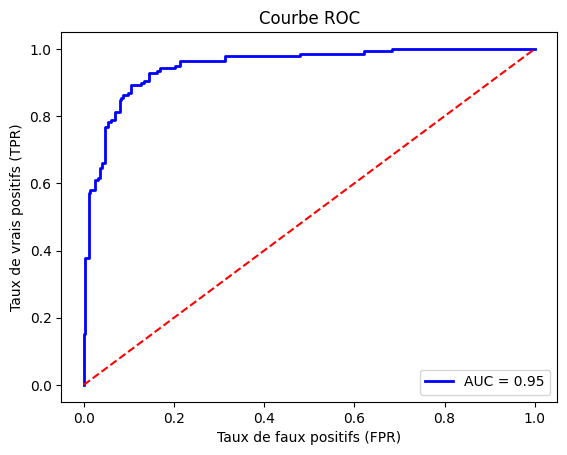

In [161]:
#Courbe ROC et AUC 
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.title('Courbe ROC')
plt.show()

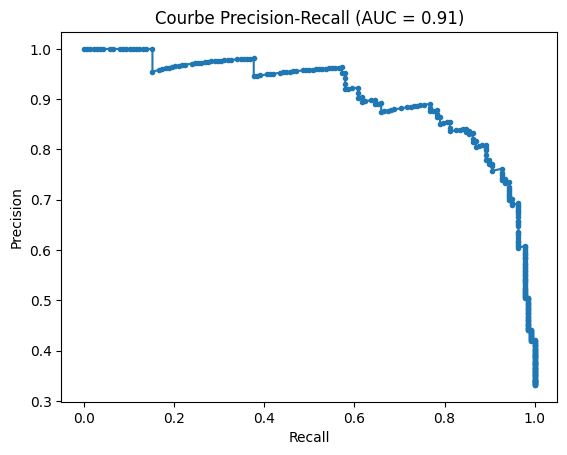

In [162]:
# Courbe de précision-rappel (Precision-Recall Curve)
precision, recall, _ = precision_recall_curve(Y_test, Y_pred_proba)
auc_pr = auc(recall, precision)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Courbe Precision-Recall (AUC = {auc_pr:.2f})')
plt.show()

#### Evaluation

In [163]:
# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred_test)
accuarncy_train=metrics.accuracy_score(Y_train, Y_pred_train)
preceision=precision_score(y_test, y_pred_test)
recall=recall_score(y_test, y_pred_test)
f1_score=metrics.f1_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [164]:
# Afficher les résultats
print(f"Scores de validation croisée : {cv_scores}")
print(f"Précision moyenne de la validation croisée : {cv_scores.mean()*100:.2f}%")
print(f"Précision globale sur l'ensemble de test : {accuracy * 100:.2f}%")
print("Rapport de classification :")
print(report)
metrics_rf = {
    'Algorithme': 'ANN',
    'Accuracy': round(accuracy*100,2),
    'Accuracy train': round(accuarncy_train*100,2),
    'Precision': round(preceision*100,2),
    'Recall': round(recall*100,2),
    'F1-Score': round(f1_score*100,2),
    'Validation croise': round(cv_scores.mean()*100,2),
    'AUC':roc_auc_test
}
results.append(metrics_rf)

Scores de validation croisée : [0.87662338 0.88311688 0.87662338 0.93464052 0.92810458]
Précision moyenne de la validation croisée : 89.98%
Précision globale sur l'ensemble de test : 86.36%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.89      0.90      0.89        99
           1       0.81      0.80      0.81        55

    accuracy                           0.86       154
   macro avg       0.85      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154



In [165]:
print(conf_matrix)

[[89 10]
 [11 44]]


<Axes: >

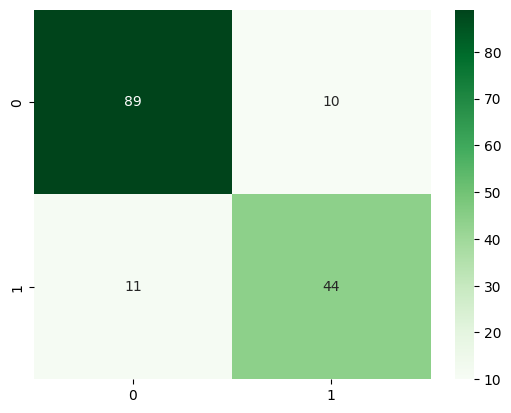

In [166]:
sns.heatmap(conf_matrix,cmap='Greens',annot=True)

In [167]:
check=pd.DataFrame(results)

In [168]:
check

,Algorithme,Accuracy,Accuracy train,Precision,Recall,F1-Score,Validation croise,AUC
0,KNN,86.36,88.11,80.36,81.82,81.08,87.11,0.92
1,LogisticRegesssion,78.57,80.62,65.28,85.45,74.02,80.47,0.86
2,DecisionTree,85.71,93.32,83.67,74.55,78.85,88.68,0.89
3,SVM,82.47,94.95,76.92,72.73,74.77,85.94,0.85
4,Randomforest,87.01,94.95,79.66,85.45,82.46,88.68,0.93
5,Naive Bayes,76.62,76.71,66.67,69.09,67.86,77.09,0.86
6,Gradient Boosting Classifier,85.71,96.25,80.00,80.00,80.00,89.85,0.95
7,AdaBoost,86.36,91.37,79.31,83.64,81.42,88.02,0.94
8,Bagging,87.01,100.00,81.82,81.82,81.82,88.67,0.94
9,LGBMClassifier,86.36,93.97,79.31,83.64,81.42,89.59,0.95


## Enregitrement des models et scaler

In [169]:
import pickle

In [170]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [171]:
with open("Randomforest.pkl", "wb") as f:
    pickle.dump(best_modelRDF, f)